# Retail sales in the USA: E-commerce and Advance Real Retail & Food Services Sales

The way we consume goods and services has evolved quite drastically since we've entered the "digital age". 
* How has e-commerce developed over the year?
* What's the share of e-commerce in the total sales?
* On the other side, how Advance Real Retail and Food Services Sales has been evolving?
* Can we predict how these types of sales evolve?

For this project, we use the 
Advance Real Retail and Food Services Sales

https://fred.stlouisfed.org/series/ECOMNSA
https://fred.stlouisfed.org/series/RRSFS
https://fred.stlouisfed.org/series/ECOMPCTSA (seasonally adjusted)
https://fred.stlouisfed.org/series/ECOMPCTNSA (not seasonally adjusted)

https://www.kaggle.com/census/e-commerce-retail-sales-series-data-collection?select=ECOMPCTSA.csv
https://www.kaggle.com/robinteuwens/forecasting-energy-demand : see EDA

E-commerce: Dates from Q4 1999 to Q1 2020.

## Import libraries

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
import os
path = os.getcwd()

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [122]:
# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [27]:
# lod dataset
df = pd.read_csv(path+'/../2_prepared_data/ECOMNSA.csv', index_col = "DATE", parse_dates = True)

In [28]:
df.tail()

,ECOMNSA
DATE,
2019-01-01,127888.0
2019-04-01,138956.0
2019-07-01,145474.0
2019-10-01,185700.0
2020-01-01,146466.0


In [29]:
# check index frequency
df.index

DatetimeIndex(['1999-10-01', '2000-01-01', '2000-04-01', '2000-07-01',
               '2000-10-01', '2001-01-01', '2001-04-01', '2001-07-01',
               '2001-10-01', '2002-01-01', '2002-04-01', '2002-07-01',
               '2002-10-01', '2003-01-01', '2003-04-01', '2003-07-01',
               '2003-10-01', '2004-01-01', '2004-04-01', '2004-07-01',
               '2004-10-01', '2005-01-01', '2005-04-01', '2005-07-01',
               '2005-10-01', '2006-01-01', '2006-04-01', '2006-07-01',
               '2006-10-01', '2007-01-01', '2007-04-01', '2007-07-01',
               '2007-10-01', '2008-01-01', '2008-04-01', '2008-07-01',
               '2008-10-01', '2009-01-01', '2009-04-01', '2009-07-01',
               '2009-10-01', '2010-01-01', '2010-04-01', '2010-07-01',
               '2010-10-01', '2011-01-01', '2011-04-01', '2011-07-01',
               '2011-10-01', '2012-01-01', '2012-04-01', '2012-07-01',
               '2012-10-01', '2013-01-01', '2013-04-01', '2013-07-01',
      

In [31]:
# set index frequency to quarterly
df.index.freq = 'QS'

## Check date ranges

In [32]:
# check for duplicates
len(set(df.index)) == len(df.index)

True

There is no duplicate indice

In [33]:
df.index[0]

Timestamp('1999-10-01 00:00:00', freq='QS-JAN')

In [34]:
df.index[len(df)-1]

Timestamp('2020-01-01 00:00:00', freq='QS-JAN')

In [38]:
idx = pd.date_range(df.index[0],df.index[len(df)-1], freq = 'QS')

In [39]:
idx

DatetimeIndex(['1999-10-01', '2000-01-01', '2000-04-01', '2000-07-01',
               '2000-10-01', '2001-01-01', '2001-04-01', '2001-07-01',
               '2001-10-01', '2002-01-01', '2002-04-01', '2002-07-01',
               '2002-10-01', '2003-01-01', '2003-04-01', '2003-07-01',
               '2003-10-01', '2004-01-01', '2004-04-01', '2004-07-01',
               '2004-10-01', '2005-01-01', '2005-04-01', '2005-07-01',
               '2005-10-01', '2006-01-01', '2006-04-01', '2006-07-01',
               '2006-10-01', '2007-01-01', '2007-04-01', '2007-07-01',
               '2007-10-01', '2008-01-01', '2008-04-01', '2008-07-01',
               '2008-10-01', '2009-01-01', '2009-04-01', '2009-07-01',
               '2009-10-01', '2010-01-01', '2010-04-01', '2010-07-01',
               '2010-10-01', '2011-01-01', '2011-04-01', '2011-07-01',
               '2011-10-01', '2012-01-01', '2012-04-01', '2012-07-01',
               '2012-10-01', '2013-01-01', '2013-04-01', '2013-07-01',
      

In [40]:
len(df) == len(idx)

True

There is no missing value for the studied period.

## Plot the data

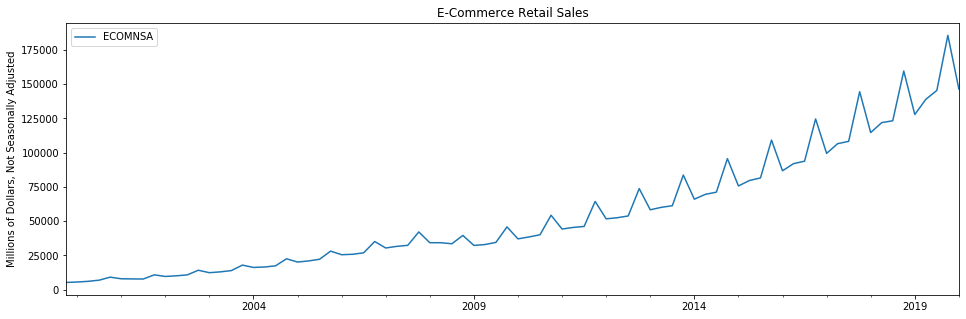

In [12]:
title = 'E-Commerce Retail Sales'
ylabel = 'Millions of Dollars, Not Seasonally Adjusted'
xlabel = ''


ax = df.plot(figsize = (16,5), title = title)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel=xlabel, ylabel=ylabel);

We observe a trend and variations that look seasonal, especially after 2009. Let's have a look at the period before 2009, as the overall scale might have somewhat hidden seasonal variations. And then, let's check using seasonal decomposition.

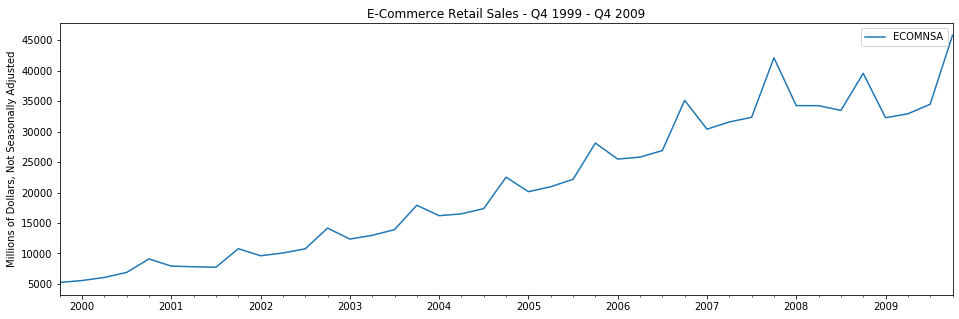

In [49]:
title = 'E-Commerce Retail Sales - Q4 1999 - Q4 2009'
ylabel = 'Millions of Dollars, Not Seasonally Adjusted'
xlabel = ''


ax = df.loc['1999-10-01':'2009-10-01'].plot(figsize = (16,5), title = title)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Seasonal decompose

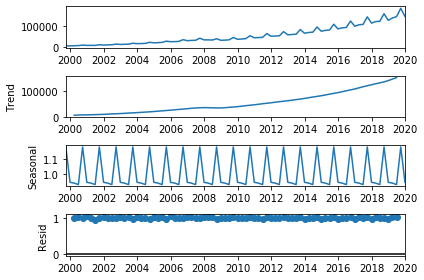

In [44]:
seasonal_decompose(df,model = 'mul').plot();

As expected, there is an increasing trend, although not constant over time:
* increase before 2008 
* decrease /stagnation in 2008
* increase (at a higher rate than before 2008) after 2009.

As expected, we also observe a peak of sales in Quarter 4, which should be linked to the sales of Christmas presents.

In [69]:
df['log10-ECOMNSA'] = np.log10(df['ECOMNSA'])

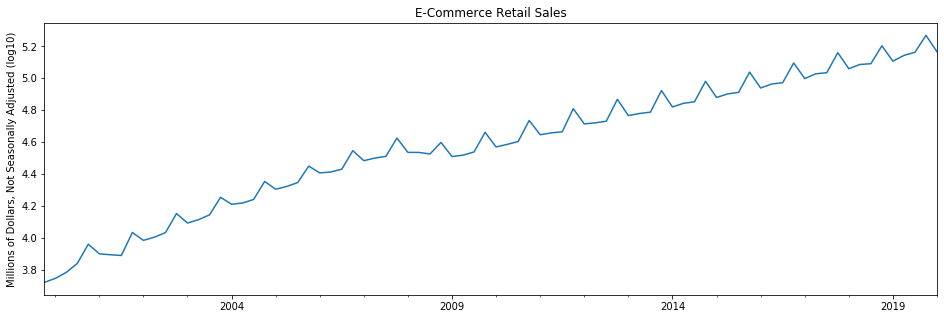

In [70]:
title = 'E-Commerce Retail Sales'
ylabel = 'Millions of Dollars, Not Seasonally Adjusted (log10)'
xlabel = ''


ax = df['log10-ECOMNSA'].plot(figsize = (16,5), title = title)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel=xlabel, ylabel=ylabel);

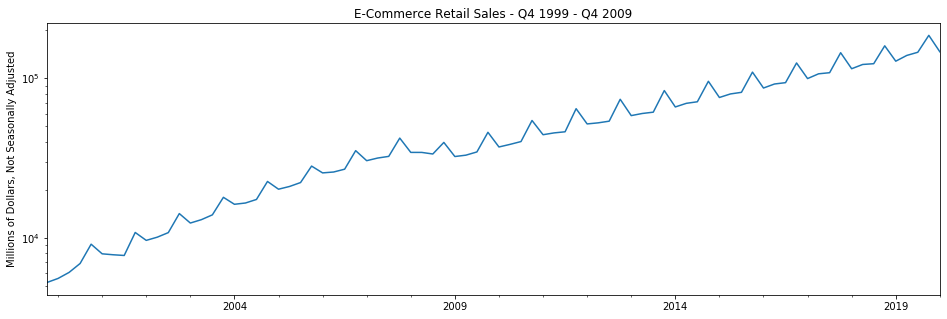

In [72]:
title = 'E-Commerce Retail Sales - Q4 1999 - Q4 2009'
ylabel = 'Millions of Dollars, Not Seasonally Adjusted (log scale)'
xlabel = ''


ax = df['ECOMNSA'].plot(figsize = (16,5), title = title)
ax.autoscale(axis = 'x', tight = True)
ax.set_yscale('log')
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
## Plot by season: each year, or boxplot
## explore stationarity via lagplot, acf plot

In [51]:
from pandas.plotting import lag_plot

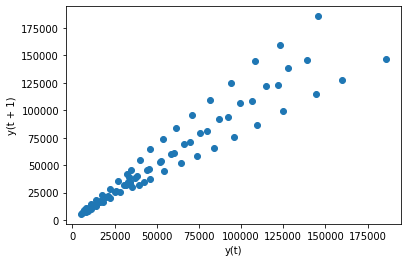

In [52]:
lag_plot(df)

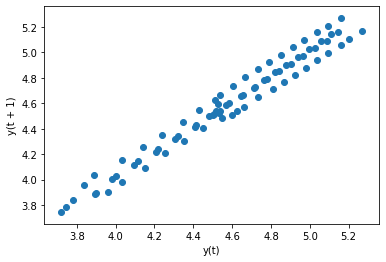

In [73]:
lag_plot(df['log10-ECOMNSA']);

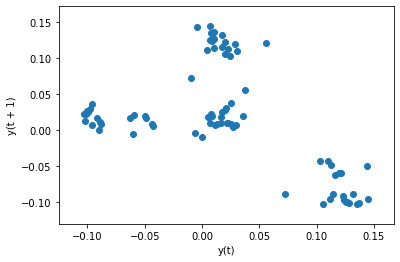

In [91]:
lag_plot(df['log10-ECOMNSA'].diff());

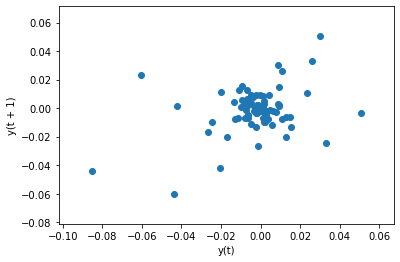

In [88]:
lag_plot(df['log10-ECOMNSA'].diff(4).diff());

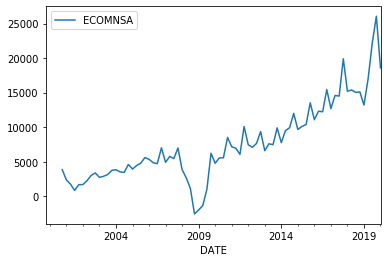

In [57]:
# let's look at the seasonally differenced data
df.diff(4).plot();

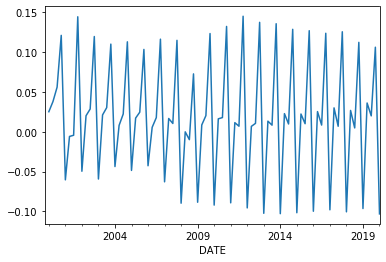

In [76]:
df['log10-ECOMNSA'].diff(1).plot();

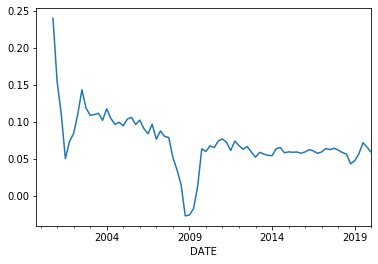

In [74]:
df['log10-ECOMNSA'].diff(4).plot();

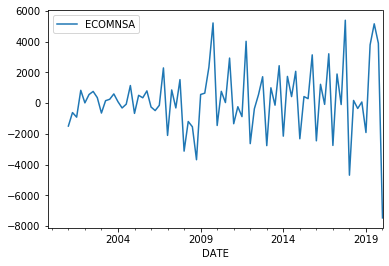

In [58]:
# let's look at the seasonally and first order differenced data
df.diff(4).diff().plot();

In [59]:
from statsmodels.tsa.stattools import adfuller

In [61]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [62]:
adf_test(df, "E-commerce sales")

Augmented Dickey-Fuller Test: E-commerce sales
ADF test statistic       3.798915
p-value                  1.000000
# lags used              6.000000
# observations          75.000000
critical value (1%)     -3.520713
critical value (5%)     -2.900925
critical value (10%)    -2.587781
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [64]:
adf_test(df.diff(4).diff().dropna(), "E-commerce sales")

Augmented Dickey-Fuller Test: E-commerce sales
ADF test statistic      -3.218829
p-value                  0.018920
# lags used              8.000000
# observations          68.000000
critical value (1%)     -3.530399
critical value (5%)     -2.905087
critical value (10%)    -2.590001
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [81]:
adf_test(df['log10-ECOMNSA'].diff().dropna())

Augmented Dickey-Fuller Test: 
ADF test statistic      -3.038042
p-value                  0.031491
# lags used              5.000000
# observations          75.000000
critical value (1%)     -3.520713
critical value (5%)     -2.900925
critical value (10%)    -2.587781
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [66]:
diff_df = df.diff(4).diff().dropna()

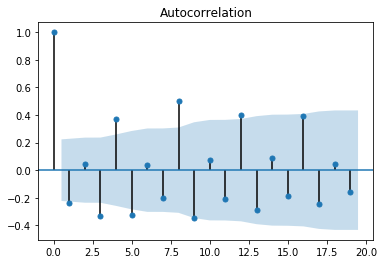

In [67]:
plot_acf(diff_df);

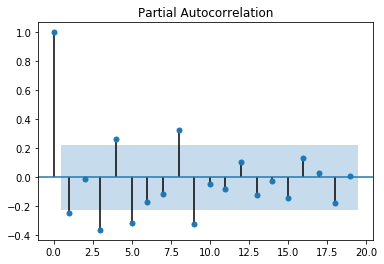

In [68]:
plot_pacf(diff_df);

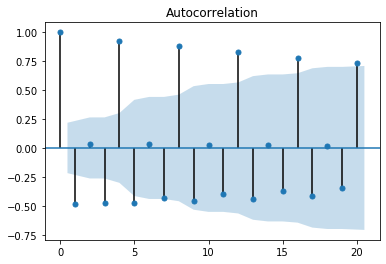

In [82]:
plot_acf(df['log10-ECOMNSA'].diff().dropna());

//anaconda/envs/tsa/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


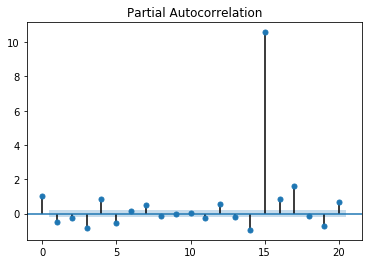

In [84]:
plot_pacf(df['log10-ECOMNSA'].diff().dropna());

## Split into train / test datasets

In [92]:
len(df)

82

In [95]:
train, test = df.iloc[:65], df.iloc[65:]

In [97]:
train.tail()

,ECOMNSA,log10-ECOMNSA
DATE,,
2014-10-01,95673.0,4.980789
2015-01-01,75718.0,4.879199
2015-04-01,79695.0,4.901431
2015-07-01,81566.0,4.911509
2015-10-01,109209.0,5.038258


In [98]:
test.head()

,ECOMNSA,log10-ECOMNSA
DATE,,
2016-01-01,86802.0,4.938530
2016-04-01,92004.0,4.963807
2016-07-01,93795.0,4.972180
2016-10-01,124651.0,5.095696
2017-01-01,99491.0,4.997784


In [99]:
## random walk performance
## simple exponential smoothing
## AR model
## MA model
## ARIMA model
## SARIMA model
## SARIMAX model
## triple exponential smoothing



## SARIMAX with dummy variables for 2008 crisis

## Build SARIMAX model

In [102]:
from pmdarima import auto_arima

In [104]:
auto_arima(df['ECOMNSA'], seasonal=True, m=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   82
Model:             SARIMAX(3, 1, 3)x(0, 1, [1], 4)   Log Likelihood                -678.222
Date:                             Thu, 21 May 2020   AIC                           1374.443
Time:                                     17:17:37   BIC                           1395.538
Sample:                                          0   HQIC                          1382.881
                                              - 82                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    177.9097    917.303      0.194      0.846   -1619.972    1975.791
ar.L1         -1.0310      0.087    -11.810      0.000      -1.202      -0.860
ar.L2         -1.0276      0.094    -10.974      0.000      -1.211      -0.844
ar.L3         -0.9964      0.064    -15.566      0.000      -1.122      -0.871
ma.L1          0.9910      0.281      3.530      0.000       0.441       1.541
ma.L2          0.8882      0.366      2.425      0.015       0.170       1.606
ma.L3          0.6709      0.244      2.746      0.006       0.192       1.150
ma.S.L4       -0.3271      0.227     -1.443      0.149      -0.771       0.117
sigma2       3.87e+06      0.029   1.33e+08      0.000    3.87e+06    3.87e+06
===================================================================================
Ljung-Box (Q):                       32.73   Jarque-Bera (JB):                43.26
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               6.80   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.43e+24. Standard errors may be unstable.
"""

In [105]:
auto_arima(df['log10-ECOMNSA'], seasonal=True, m=4).summary()

ValueError: negative dimensions are not allowed

In [106]:
# install --upgrade pmdarima

In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [115]:
model = SARIMAX(train['ECOMNSA'], order = (3, 1, 3), seasonal_order = (0, 1, 1, 4), enforce_invertibility= False)

In [117]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             ECOMNSA   No. Observations:                   65
Model:             SARIMAX(3, 1, 3)x(0, 1, [1], 4)   Log Likelihood                -518.328
Date:                             Thu, 21 May 2020   AIC                           1052.656
Time:                                     17:28:21   BIC                           1069.410
Sample:                                 10-01-1999   HQIC                          1059.209
                                      - 10-01-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0104      0.239     -4.224      0.000      -1.479      -0.542
ar.L2         -0.9992      0.192     -5.202      0.000      -1.376      -0.623
ar.L3         -0.9856      0.119     -8.294      0.000      -1.218      -0.753
ma.L1          0.8810      0.522      1.688      0.091      -0.142       1.904
ma.L2          0.8562      0.469      1.827      0.068      -0.062       1.775
ma.L3          0.7390      0.404      1.829      0.067      -0.053       1.531
ma.S.L4       -0.2493      0.223     -1.116      0.264      -0.687       0.188
sigma2      2.653e+06    7.2e+05      3.687      0.000    1.24e+06    4.06e+06
===================================================================================
Ljung-Box (Q):                       18.37   Jarque-Bera (JB):                67.74
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.85   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.07e+14. Standard errors may be unstable.
"""

In [119]:
start = len(train)
end = len(train) + len(test) - 1

In [120]:
predictions = results.predict(start = start, end = end, dynamic = False, type = 'lev').rename('SARIMAX(3, 1, 3)x(0, 1, 1, 4) predictions')

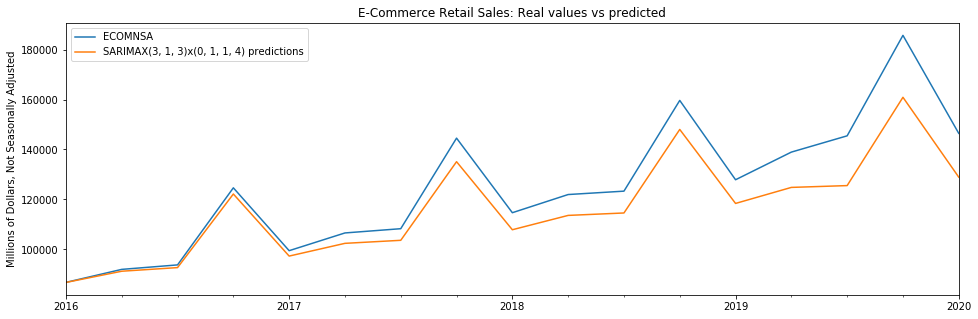

In [126]:
title = 'E-Commerce Retail Sales: Real values vs predicted'
ylabel = 'Millions of Dollars, Not Seasonally Adjusted'
xlabel = ''


ax = test['ECOMNSA'].plot(figsize = (16,5), title = title, legend = True)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel=xlabel, ylabel=ylabel)
predictions.plot(legend = True);

## Evaluate model

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [124]:
error1 = mean_absolute_error(test['ECOMNSA'], predictions)

error2 = np.sqrt(mean_squared_error(test['ECOMNSA'], predictions))

print(f'SARIMAX(3, 1, 3)x(0, 1, 1, 4) - MAE: {error1:11.10}')
print(f'SARIMAX(3, 1, 3)x(0, 1, 1, 4) - RMSE: {error2:11.10}')

SARIMAX(3, 1, 3)x(0, 1, 1, 4) - MAE: 8596.669395
SARIMAX(3, 1, 3)x(0, 1, 1, 4) - RMSE: 11054.68543


In [127]:
### UPGRADE PMDARIMA PACKAGE?